# Combination: custom-random-raw

Custom CNN
Random split
Raw images (no bounding box)

In [1]:
import torch

import os

import paths

from sysinfo import get_device

from torchvision.datasets import ImageFolder

from transforms import get_transforms

from customcnn import make_model

from train import training_loop

from test_model import test_model



In [2]:
MODEL_ID = 'custom-random-raw'
SAVED_MODEL_PATH = os.path.join(paths.models, MODEL_ID + '.pth')

In [3]:
device = get_device()

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda


In [4]:
dataset = ImageFolder(paths.random_splits_train, transform=get_transforms())
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8)

In [5]:
model = make_model(device)

In [ ]:
if os.path.exists(SAVED_MODEL_PATH):
    model.load_state_dict(torch.load(SAVED_MODEL_PATH))
else:
    training_loop(5, model, data_loader, device)
    torch.save(model.state_dict(), SAVED_MODEL_PATH)

C:\Users\lootman\AppData\Local\Temp\ipykernel_20968\3563114068.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(SAVED_MODEL_PATH))


In [8]:
test_dataset = ImageFolder(paths.random_splits_test, transform=get_transforms())
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=8)


Accuracy of the model on the test images: 2.47%


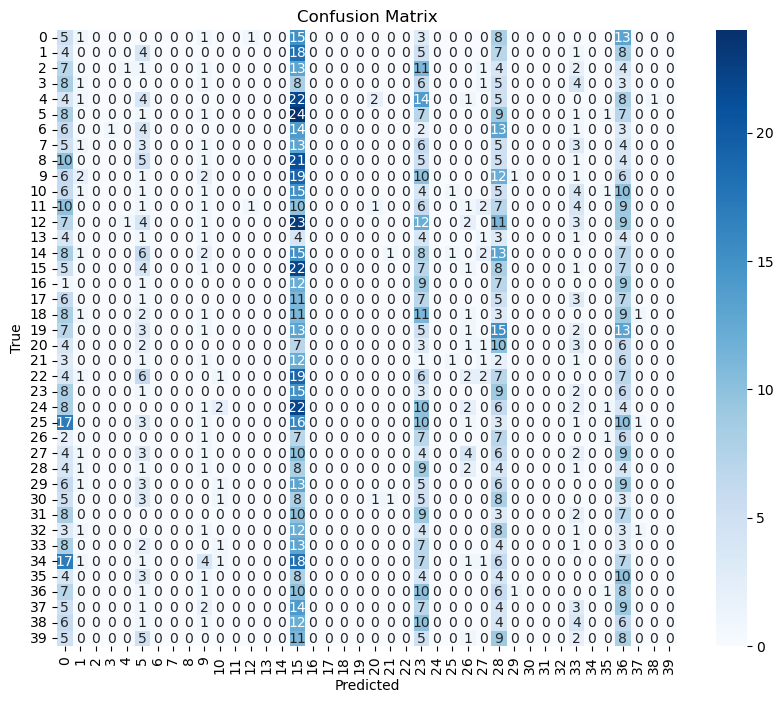

In [9]:
correct, total, accuracy, all_labels, all_predictions = test_model(model, test_data_loader, device)